# 02결정트리

규칙노드로 규칙 조건으르 삼고 리프노드로 표시된 노드는 결정된 클래스 값이다.
많은 규칙이 있다는 것은 분류를 결정하는 방식이 복잡해진다는 말이고, 이는 과적합으로 이어지기 쉽다.
따라서 가능한 적은 결정노드로 높은 예측정확도를 가지게 데이터를 분류할 수 있도록 결정 노드의 규칙이 정해져야 하며 이를 위해서는 최대한 균일한 데이터 세트를 구성할 수 있도록 트리를 분할해야한다.

정보이득 : 엔트로피기반. 서로다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
    1-엔트로피지수가 정보 이득으로 정보이득이 높은 속성을 기준으로 분할한다.
    
지니계수 : 0이 가장 평등하고 1로 갈수록 불평등함.
머신러닝에서는 지니계수가 낮을수록 균일도가 높은것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.
->디시전트리가 지니게수를 이용함

# 결정 트리 모델의 특징

결정트리의 일반적인 알고리즘은 정보이득이 높거나 지니계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한뒤,
                             데이터가 모두 특정분류에 속하면 분할을 멈추고 분류를 정한다.

In [1]:
#결정 트리 장점 : 쉽고 직관적 , 피처의 스케일링이나 정규화등의 사전 가공 영향도가 크지않음.
#결정트리 단점 : 과적합으로 알고리즘 성능이 떨어짐. 따라서 트리의 크기를 사전에 제한하는 튜닝 필요.

# 결정트리 파라미터 (DecisionTreeClassifier 기준)

min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터수로 과적합을 제어하는데 사용함 / 디폴트는 2이고 작게 설정할수록
분할되는 노드가 많아져서 과적합가능성 높음.

min_samples_leaf 
-분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수
-큰 값으로 설정될수록, 분할될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플데이터 수 조건을 만족시키기
어려우므로 노드 분할을 상대적으로 덜 수행함.
-min_samples_split와 유사하게 과적합 제어 용도.

max_features 
-최적의 분할을 위해 고려할 최대 피처개수.
-'sqrt'는 전체 피처중 sqrt즉, (전체피처개수)^0.5 만큼 선정
-log는 전체 피처중 log2 선정
-None은 전체 피처 선정

max_depth 
-트리의 최대 깊이를 규정.

max_leaf_nodes 
-말단 노드의 최대개수









# 결정트리 모델의 시각화

In [2]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


결정트리 알고리즘이 어떤 규칙으로 트리를 생성하는지 시각적으로 보여주는 방법 - > Graphviz 패키지

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)


#붓꽃 데이터를 로딩하고 , 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,
                                                test_size=0.2 , random_state=11) 

#DecisionTreeClassifier 학습.
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz #export_graphviz : 그래프비즈가 읽어 들여서 그래프 형태로 시각화할수있는 출력파일생성

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True) #graohviz(extimator,outputfile명,결정클래스명칭,피처명칭)
#impurity = false 지니계수 출력x, filled 색깔

주의 :
 pip install로 하면 아래 경로에 설치가 된다.

C:\Users\Anaconda3\Lib\site-packages\graphviz

따라서 conda install로 설치를 하여

C:\Users\Anaconda3\Library\bin\graphviz

이 위치에 설치되게 해야한다.

pip는 python의 정식 지원을 받는 패키지만을 관리하는 관리자이고, conda는 anaconda에서 지원 받는 패키지 만을 관리하는 관리자입니다.

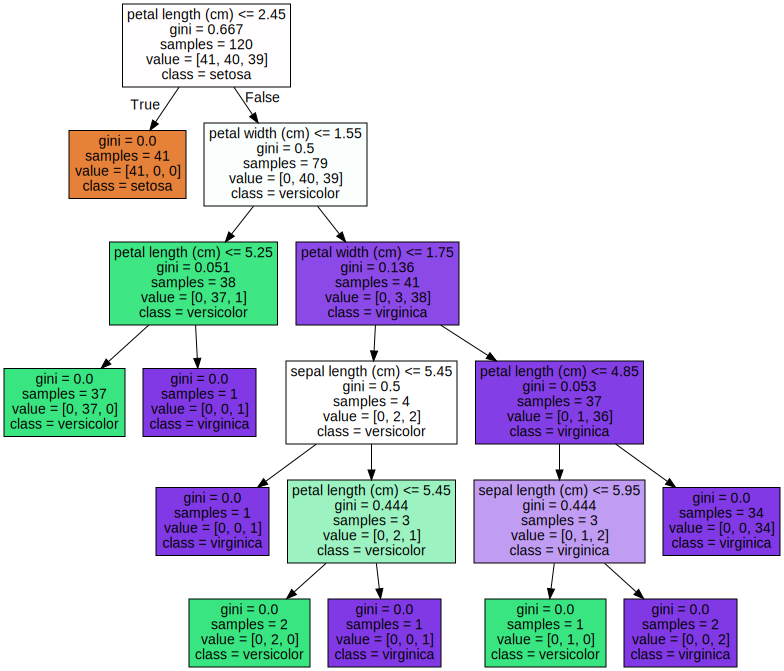

In [5]:
import graphviz
#위에서 생성된 tree.dot파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot")as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)



value=[]는 각각 setosa,versicolor,virginica의 데이터 개수를 의미


Feature importances :
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

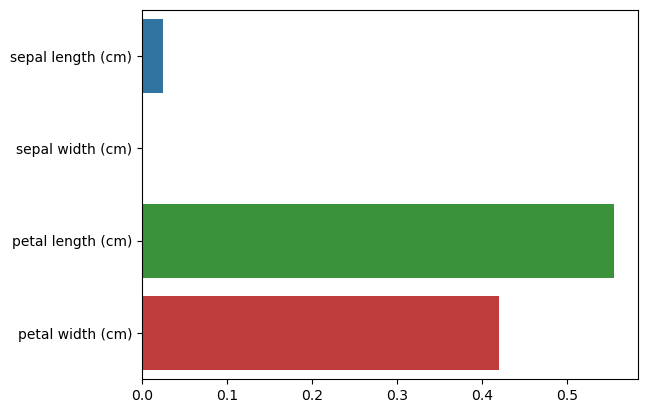

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances :\n{0}".format(np.round(dt_clf.feature_importances_,3))) #dt_clf : 아까 결정트리에서 객체변수로 사용된 속성들

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)


# 결정 트리 과적합

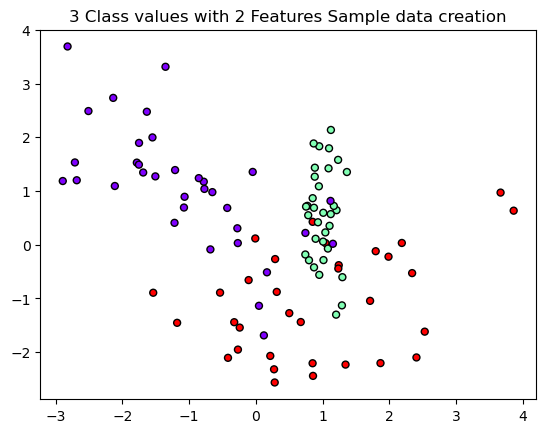

In [7]:
from sklearn.datasets import make_classification

#sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)[source]


import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.  feature - > 각각 X축,Y축
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
import numpy as np



In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: name 'visualize_boundary' is not defined

하이퍼파라미터가 디폴트라 트리생성에 제약이없음 - > 리프노드안의 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할기준
과적합현상

In [10]:

# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels) #sample_leaf=6으로 제약함
visualize_boundary(dt_clf, X_features, y_labels)

NameError: name 'visualize_boundary' is not defined

# 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [12]:
feature_dup_df = feature_name_df.groupby('column_name').count() # 피처명을 column_name 으로 그룹화하여 각각에 해당하는 자료들 갯수 저장
print(feature_dup_df[feature_dup_df['column_index'] > 1].count()) # 위 변수의 개수가 1이 넘는 것들(중복값)의 갯수 출력
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [13]:
print(feature_dup_df) # 얘는 어떤형태??

                                      column_index
column_name                                       
angle(X,gravityMean)                             1
angle(Y,gravityMean)                             1
angle(Z,gravityMean)                             1
angle(tBodyAccJerkMean),gravityMean)             1
angle(tBodyAccMean,gravity)                      1
...                                            ...
tGravityAccMag-max()                             1
tGravityAccMag-mean()                            1
tGravityAccMag-min()                             1
tGravityAccMag-sma()                             1
tGravityAccMag-std()                             1

[477 rows x 1 columns]


In [14]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), # cumcount : 중복갯수 세어줌.
                                  columns=['dup_cnt']) #'column name' 그룹화된 애들의 중복갯수를 세어주고  dup_cnt라고 묶어줌
    feature_dup_df = feature_dup_df.reset_index() 
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1) 
    #apply : 함수를 열또는 행에다가 적용해줌. 즉 여기서는 컬럼네임
    
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [15]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


제법 고르게 분포됨

In [18]:
print(y_train['action'].value_counts())
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test) 
accuracy = accuracy_score(y_test , pred) 
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64
결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}
Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [20]:
#GridSearchCV 객체의 cv_result_속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)


#max_depth 파라미터 값과 그때의 테스트 세트,학습 데이터 세트의 정확도 수치 추출.
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


지금까지 한건 Gridsearch cv로한 폴드 세트로 시행한 교차검정.

밑에서 하는건 별도의 테스트 데이터 세트 지정해서 하나만 하는것.

In [21]:

max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [22]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
} #이번엔 min_samples_split 도 같이 변경

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 ) #검증 데이터세트 형성
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}
결정 트리 예측 정확도:0.8717


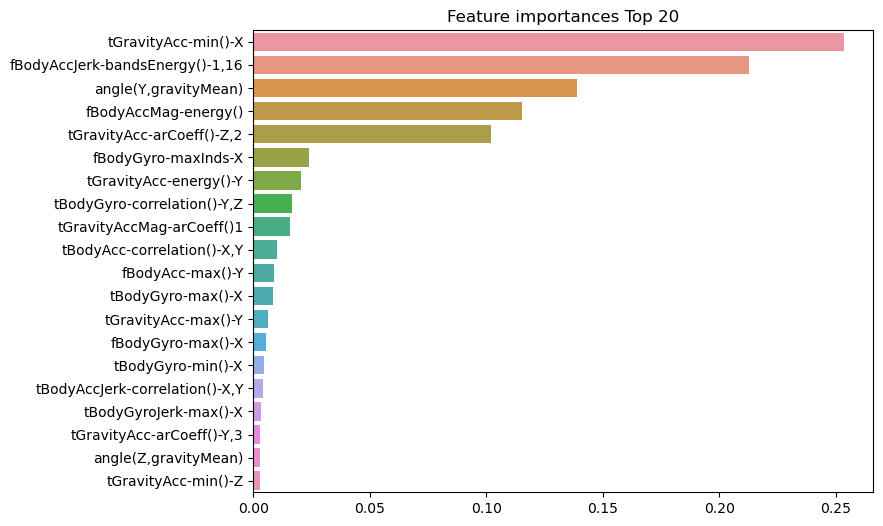

In [23]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [24]:
#개별 모델은 로지스틱 회귀와 KNN임.
lr_crf=LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)


NameError: name 'LogisticRegression' is not defined

In [25]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf] #knn,logistic회귀기반
for classifier in classifiers: 
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


# 04 랜덤 포레스트

배깅 : 보팅과 다르게 같은알고리즘으로 여러개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 
중첩되게 샘플링된 데이터 세트임. 이렇게 여러개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping)분할 방식 이라고 함.

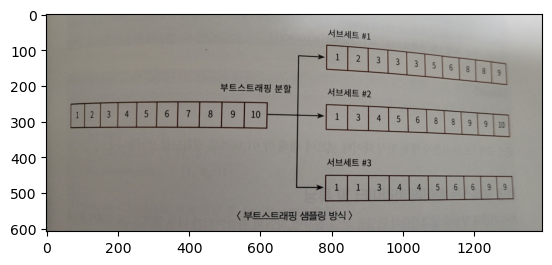

In [26]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('사진캡처/boot_sampling.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame qksghks
X_train,X_test,y_train,y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0,max_depth=8)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test) #테스트X에 대한 레이블예측값
accuracy=accuracy_score(y_test,pred) # 정답과 레이블 예측값 사이의 ACCURACY 측정
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))
print(pred)


랜덤 포레스트 정확도 : 0.9196
[5 5 5 ... 2 2 1]


랜덤포레스트 하이퍼 파라미터 및 튜닝

트리 기반 앙상블 알고리즘 단점 : 하이퍼 파라미터가 너무 많아서 튜닝에 시간이 오래걸림

# 랜덤포레스트에서 대표적인 파라미터
n_estimators : 결정트리의 개수 지정 , 디폴트 10개
max_features :  결정트리의 max_features와 같음. 
n_jobs : CPU 코어갯수

이번에는 GridSearch CV로 랜덤포레스트의 하이퍼파라미터를 튜닝하겠다.

In [28]:

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf': [1,6,12],
    'min_samples_split' : [2,8,16]
} #파라미터 집합설정

#RandomForestClassifier 객체 생성 후 GridSearchCV수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state =0,n_jobs=-1) #결정트리갯수100개 ,CPU 코어 한개 ,random_state(시드값)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1) #교차검증 fold 2개 , params를 후보로 두고 탐색
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 : 0.9165


위에서 추출한 세트로 RandomForestClassifier 다시 학습시키기

In [29]:
rf_clf1=RandomForestClassifier(n_estimators=100, min_samples_leaf=6,max_depth=16,
                              min_samples_split=2,random_state=0) #위에서 나온값 : 최소 자식노드(samples_leaf) 6, 깊이 16
rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9260


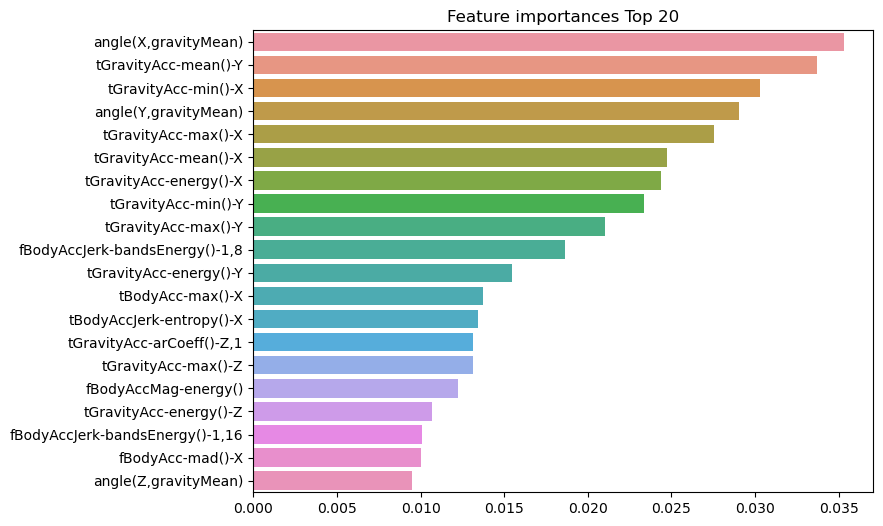

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20] 
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()


# 05 GBM 

GBM의 개요 및 실습

부스팅 알고리즘 : 여러개의 약한 학습기를 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여를 통해
    오류를 개선해나가면서 학습하는 방식

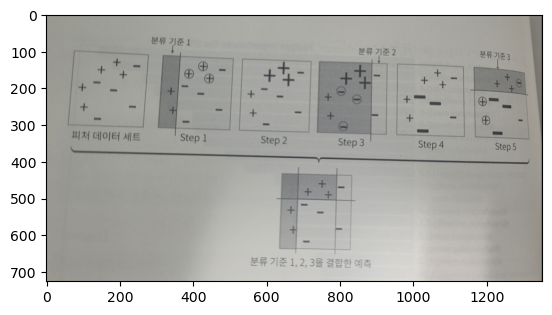

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('사진캡처/gbm(1).JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

맨 왼쪽 그림처럼 +와 -로 된 피처 데이터 세트가 있다면
1)step 1은 첫번째 약한 학습기가 분류 기준 1로 +와 -를 분류한 것.
2)step 2는 이 오류 데이터에 대해서 가중치 값을 부여
3)step 3는 두번째 약한 학습기가 분류기준 2로 +와 -를 분류함.
4)step 4는 잘못 분류된 이 - 오류데이터에 대해 다음 약한 학습기가 잘 분류하도록 더 큰 가중치 부여
5)step 5는 세번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터 찾음.
6) 맨아래는 첫번째,두번째,세번재 약한 학습기를 모두 결합한 결과 예측임.

GBM도 유사하나 가중치 업데이트를 경사 하강을 이용하는 것이 큰 차이임.



분류의 실제 결괏값을 y, 피쳐값을 x1,x2,...,xn 그리고 이 피처에 기반한 예측 함수를 F(x)함수라고 하면 오류식 h(x)=y-F(x)가됨.
이 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사하강법(Gradient Descent) 

사이킷런의 GBM기반 분류 : GradientBoostingClassifer 클래스.

 이를 이용해 이전에 한 사용자 행동 데이터 세트를 예측분류해보자.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

#Gbm 수행시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

print('GBM정확도 : {0:4f}'.format(gb_accuracy))
print("GBM 수행시간 : {0:.1f}초".format(time.time()-start_time))


GBM정확도 : 0.938921
GBM 수행시간 : 1312.6초


GBM 하이퍼파라미터 소개

-loss : 경사하강법에서 사용할 비용 함수를 지정.

-learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. Week learner가 순차적으로 오류값을 보정해 나가는데 적용하는 계수.

-n_estimators : week learner의 개수

-subsample : week learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1 



# 06 XGBoost

In [33]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [43]:
import xgboost

print(xgboost.__version__)
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)



1.7.3


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


파이썬 래퍼 XGBoost 적용 – 위스콘신 유방암 예측

파이썬 래퍼XGBoost 하이퍼파라미터
-일반 파라미터 : 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터
-부스터 파라미터 : 트리 최적화,부스팅,regularization 등과 관련 파라미터 지칭.
-학습 태스크 파라미터 : 학습 수행 시의 객체함수,평가를 위한 지표등을 설정하는 파라미터
    
주요일반 파라미터
-booster
silen

주요 부스터 파라미터
-eta[default=0.3, alias: learning_rate]:GBM의 학습률과 같은 파라미터
-num_boost_rounds : GBM의 n_estimators와 같은 파라미터
-gamma[default=0,alias : min_split_loss]:트리의 리프노드를 추가적으로 나눌지 결정할 최소손실 감소값.
    

In [44]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

(455, 30) (114, 30)
(409, 30) (46, 30)


In [45]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086
[176]	train-logloss:0.01258	eval-logloss:0.26103


In [46]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None): #예전에 만든 함수, 오차행렬 및 각종 성능지표출력 함수.
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [48]:
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9937


In [49]:
#사이킷런 래퍼 XGBooat 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

#Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth=3,
eval_metric='logloss')
xgb_wrapper.fit(X_train,y_train,verbose=True) #학습데이터로 검증데이터 분할 이전인 세트 이용
w_preds = xgb_wrapper.predict(X_test) #테스트는 그대로 X_test 이용
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


In [50]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [55]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3) #XGBClassifier 모델을 생성하고, 하이퍼파라미터설정.
evals = [(X_tr, y_tr),(X_val,y_val)] # [(학습용데이터),(검증용데이터)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", 
                eval_set=evals, verbose=True) #학습

#early_stooping_rounds : 반복횟수 지정, eval_metric : 조기중단 평가지표, eval_set : 성능평가

ws50_preds = xgb_wrapper.predict(X_test) #x_test 데이터에 대한 예측값
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] #클래스 1에대한 예측확률저장

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

[130]	validation_0-logloss:0.01886	validation_1-logloss:0.25712
[131]	validation_0-logloss:0.01863	validation_1-logloss:0.25609
[132]	validation_0-logloss:0.01839	validation_1-logloss:0.25649
[133]	validation_0-logloss:0.01816	validation_1-logloss:0.25789
[134]	validation_0-logloss:0.01802	validation_1-logloss:0.25811
[135]	validation_0-logloss:0.01785	validation_1-logloss:0.25794
[136]	validation_0-logloss:0.01763	validation_1-logloss:0.25876
[137]	validation_0-logloss:0.01748	validation_1-logloss:0.25884
[138]	validation_0-logloss:0.01732	validation_1-logloss:0.25867
[139]	validation_0-logloss:0.01719	validation_1-logloss:0.25876
[140]	validation_0-logloss:0.01696	validation_1-logloss:0.25987
[141]	validation_0-logloss:0.01681	validation_1-logloss:0.25960
[142]	validation_0-logloss:0.01669	validation_1-logloss:0.25982
[143]	validation_0-logloss:0.01656	validation_1-logloss:0.25992
[144]	validation_0-logloss:0.01638	validation_1-logloss:0.26035
[145]	validation_0-logloss:0.01623	valid

In [56]:
get_clf_eval(y_test,ws50_preds,ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9933


In [59]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True) #10번동안 개선 안되면 중단해버림.

ws10_preds = xgb_wrapper.predict(X_test) 
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)


[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

너무 일찍 멈춰버리면 각종지표들 성능 저하됨